C-MDS >> ISOMAP

In [136]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
filename = os.getcwd()+"\\datasets\\hyperplane.csv"
dataset=pd.read_csv(filename)

limit_obs = 200
limit_comp = 10
X = dataset.iloc[:limit_obs, :limit_comp].values  
y = dataset.iloc[:limit_obs, -1].values

pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,68.844221,-51.353317,213.561068,-176.373629,-98.100638,-122.033712,-103.539952,135.061472,-131.135501,41.514439
1,-46.733668,35.796782,-103.544282,135.799414,64.725655,54.693454,66.232147,-72.522605,59.436118,-5.632694
2,81.909548,-58.542035,202.727378,-235.098643,-94.538931,-127.026756,-127.820988,160.094976,-124.973684,42.822364
3,-68.844221,61.171767,-178.330980,183.896845,92.495030,126.764978,103.518207,-146.947253,103.142257,-39.028736
4,-34.673367,13.820293,-87.886735,90.628479,32.638112,56.344579,63.256513,-73.055291,55.058452,-8.095892
...,...,...,...,...,...,...,...,...,...,...
195,-45.728643,29.838406,-133.330023,127.696229,62.411398,63.138929,73.866368,-105.864542,71.755116,-34.824781
196,-59.798995,36.940478,-164.913746,169.046863,104.843752,120.086974,74.309701,-115.057938,94.709032,-28.675584
197,-65.829146,38.343033,-182.328477,180.037960,88.640283,124.182792,99.955863,-122.212228,93.896114,-35.157555
198,-69.849246,58.618229,-187.604061,222.022752,103.759432,125.513595,95.665621,-139.010331,98.994878,-31.345842


In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [138]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [139]:
# Floyd Warshall Algorithm
#https://cppsecrets.com/users/5629115104105118971091101011031055657495564103109971051084699111109/Python-Floyd-Warshall-Algorithm.php
INF = float("inf")

# for Kernep PCA we use a threshold distance

def floydWarshall(graph, threshold):
    # number of vertices in the graph
    n = len(graph)
    
    # dist will be the output matrix that will have the shortest distances between every pair of vertex.
    dist = [[] for _ in range(n)]
    
    
    # Initialize the dist matrix as same as the input graph matrix.
    for i in range(n):
        for j in range(n):
            if (graph[i][j] < threshold): 
                dist[i].append(abs(graph[i][j]))
            else:
                dist[i].append(INF)

    # Taking all vertices one by one and setting them as intermediate vertices
    for k in range(n):
        # Pick all vertices as source one by one.
        for i in range(n):
            # Pick all vertices as the destination for the above choosen source vertex.
            for j in range(n):
                # Update the value of dist[i][j] if k provides a shortest path from i to j
                dist[i][j] = min(dist[i][j],dist[i][k]+dist[k][j])

    # print shortest distance for every pair of vertex.
    return np.array(dist)


In [140]:
#Gram Matrix
G = X.dot(X.T)
G.shape

(200, 200)

In [141]:
threshold = 1.0

dist = floydWarshall(G, threshold)
df= pd.DataFrame(dist)

In [142]:
## covariance matrix
C = np.cov(X_train, rowvar = False)


In [143]:
#classical MDS - cmdscale
from __future__ import division
import numpy as np
 
def cmdscale(D):
    """                                                                                       
    Classical multidimensional scaling (MDS)                                                  
                                                                                               
    Parameters                                                                                
    ----------                                                                                
    D : (n, n) array                                                                          
        Symmetric distance matrix.                                                            
                                                                                               
    Returns                                                                                   
    -------                                                                                   
    Y : (n, p) array                                                                          
        Configuration matrix. Each column represents a dimension. Only the                    
        p dimensions corresponding to positive eigenvalues of B are returned.                 
        Note that each dimension is only determined up to an overall sign,                    
        corresponding to a reflection.                                                        
                                                                                               
    e : (n,) array                                                                            
        Eigenvalues of B.                                                                     
                                                                                               
    """
    # Number of points                                                                        
    n = len(D)
 
    # Centering matrix                                                                        
    H = np.eye(n) - np.ones((n, n))/n
 
    # YY^T                                                                                    
    B = -H.dot(D**2).dot(H)/2
 
    # Diagonalize                                                                             
    evals, evecs = np.linalg.eigh(B)
 
    # Sort by eigenvalue in descending order                                                  
    idx   = np.argsort(evals)[::-1]
    evals = evals[idx]
    evecs = evecs[:,idx]
 
    # Compute the coordinates using positive-eigenvalued components only                      
    w, = np.where(evals > 0)
    L  = np.diag(np.sqrt(evals[w]))
    V  = evecs[:,w]
    Y  = V.dot(L)
 
    return Y, evals

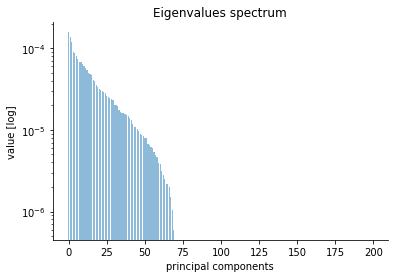

In [144]:
#MDS of Gram matrix
G = X.dot(X.T)
Y, evals = cmdscale(G)
#eigenvalue spectrum log scale
fig, ax = plt.subplots()
bar_plot = plt.bar( x=range(len(evals)), height=evals,  alpha = .5)
plt.title(f'Eigenvalues spectrum')
plt.xlabel('principal components')
plt.ylabel('value [log]')
plt.yscale("log")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

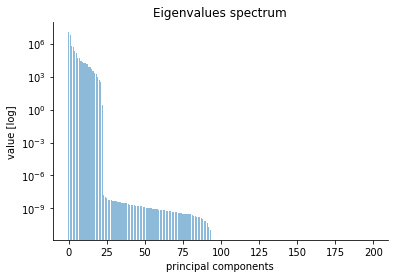

In [145]:
#ISOMAP = MDS of distance matrix
threshold = 0.0
dist = floydWarshall(G, threshold)
Y, evals = cmdscale(dist)
#eigenvalue spectrum log scale
fig, ax = plt.subplots()
bar_plot = plt.bar( x=range(len(evals)), height=evals,  alpha = .5)
plt.title(f'Eigenvalues spectrum')
plt.xlabel('principal components')
plt.ylabel('value [log]')
plt.yscale("log")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)


In [146]:
evals[:2], Y[:2]

(array([10881497.15969332,  5990176.11779703]),
 array([[-1.62910155e+02, -2.78323942e+02,  9.15463261e+01,
         -5.35316074e+01,  1.27902561e+01, -9.13093980e+00,
          4.93399127e+00, -8.28501537e-01,  1.38443288e+00,
         -3.15179928e+00,  3.93259497e-01,  1.32943635e+00,
          1.17178894e-01,  2.85147179e-01, -1.75519096e-01,
         -2.65442132e-01, -5.04560517e-01, -4.45639539e-01,
          4.14873987e-01, -1.49255803e-01,  2.40693342e-04,
         -4.35682276e-02,  1.51848212e-04,  2.30036337e-07,
          6.35032319e-07,  3.02005816e-07,  1.42353391e-07,
          5.81535269e-07,  0.00000000e+00,  4.51636095e-07,
          6.87880787e-05,  0.00000000e+00,  0.00000000e+00,
          3.84560479e-07,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00, -1.71078126e-07,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.88836574e-07,  0.00000000e+00,  0.000000

In [147]:
import matplotlib.pyplot as plt
Y2 = Y[:2]*len(Y)
print(Y2.shape)

(2, 94)


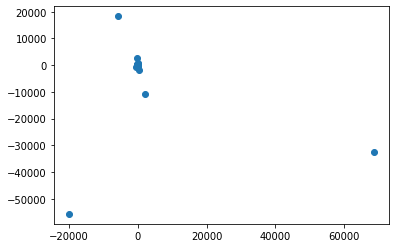

In [148]:
plt.scatter(y=Y2[0], x=Y2[1])